# T5_MapOfScience_Adaptation_Nanotechnology_drugs
## GBI6-2021I: BIOINFORMÁTICA
## Porras Dilan

In [1]:
%matplotlib inline
#Libreria panda se guarda como pd.
import pandas as pd
#Módulo que proporciona operaciones de coincidencia de expresiones regulares.
import re
#Módulo que permite manipular archivos csv. 
import csv

In [2]:
#Se abre el archivo para ser revisado. "With" cierra el archivo una vez guardado como f.
with open('github/pubmed-nanotechnology_drugs-set.txt', encoding="utf8") as f:
    # Se actualiza el archivo a lectura. 
    my_text = f.read()
#Se reemplaza la expresión regular con un espacio vacio, para eliminar espacios en blanco.
my_text = re.sub(r'\n\s{6}', ' ', my_text)
print(my_text[:2000])

PMID- 19206243
OWN - NLM
STAT- MEDLINE
DCOM- 20090318
LR  - 20090211
IS  - 1936-086X (Electronic)
IS  - 1936-0851 (Linking)
VI  - 3
IP  - 1
DP  - 2009 Jan 27
TI  - Impact of nanotechnology on drug delivery.
PG  - 16-20
LID - 10.1021/nn900002m [doi]
AB  - Nanotechnology is the engineering and manufacturing of materials at the atomic and  molecular scale. In its strictest definition from the National Nanotechnology  Initiative, nanotechnology refers to structures roughly in the 1-100 nm size regime  in at least one dimension. Despite this size restriction, nanotechnology commonly  refers to structures that are up to several hundred nanometers in size and that are  developed by top-down or bottom-up engineering of individual components. Herein, we  focus on the application of nanotechnology to drug delivery and highlight several  areas of opportunity where current and emerging nanotechnologies could enable  entirely novel classes of therapeutics.
FAU - Farokhzad, Omid C
AU  - Farokhzad OC

In [3]:
countries = []
#"splitlines()" divide la cadena en función de las líneas. 
#Se rompe la cadena en los límites de la línea y devuelve una lista de cadenas divididas.
#Bucle "for" permite aplicar el "splitlines" en todas las líneas.
for ln in my_text.splitlines():
    if ln.startswith("AD  -"):
#Se guardan las direcciones "lineas que inician con AD".
        adreess = ln[:]
#Expresión regular busca:
#(\,\s) → coma con espacio vacio
#(([\sA-Za-z{2:50}])+) → nombre del país (de 2 a 50 caracteres), (+) se repite lo necesario y termina en punto. 
        country = re.findall(r'\,\s([\sA-Za-z{2:50}]+)\.', adreess)
#Se añade lo encontrado con la expresión regular a la lista vacia de countries.
        countries.append(country)
#Desenlace de una lista de listas
import itertools
countries = list(itertools.chain.from_iterable(countries))
print(countries[1:500])
len(countries)

['Iran', 'Iran', 'Iran', 'Iran', 'India', 'India', 'India', 'India', 'USA', 'USA', 'USA', 'USA', 'India', 'India', 'B', 'India', 'India', ' United States', ' United States', 'USA', 'USA', 'China', 'USA', 'USA', 'USA', 'USA', 'Italy', 'Italy', 'India', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'USA', 'USA', 'USA', 'P', 'Jordan', 'P', 'Jordan', 'P', 'Jordan', 'India', 'P R  China', 'USA', 'Inc', 'USA', 'USA', ' India', ' India', 'Malaysia', 'Australia', 'India', ' India', 'USA', 'Iran', 'USA', 'Selangor', 'Malaysia', ' Thailand', 'USA', 'USA', 'Finland', 'Finland', 'Finland', 'Finland', 'Finland', 'China', 'Finland', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Texas', 'Texas', 'Texas', 'Texas', 'Texas', 'Texas', 'Texas', 'Texas', 'Italy', ' Italy', ' Italy', ' Italy', 'Italy', 'Spain', 'Spain', ' Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'China', 'China', 'China', 'India', 'India', 'Ind

37046

In [4]:
#Se crea un listado del conjunto creado por "set". No se repiten los elementos y todos se guardan como un único elemento. 
uniq_countries = list(set(countries))
#Se cuenta el número de elementos en el listado.
len(uniq_countries)

903

In [5]:
#Se crea un diccionario vacio "contry_coords".
country_coords = {}
#Se abre el archivo para ser revisado y "with" lo cierra una vez guardado como f.
with open('github/countries_coordinates.txt') as f:
    csvr = csv.DictReader(f)   
    for row in csvr:
        country_coords[row['name']] = [float(row['latitude']), 
                                       float(row['longitude'])]
len(country_coords)

244

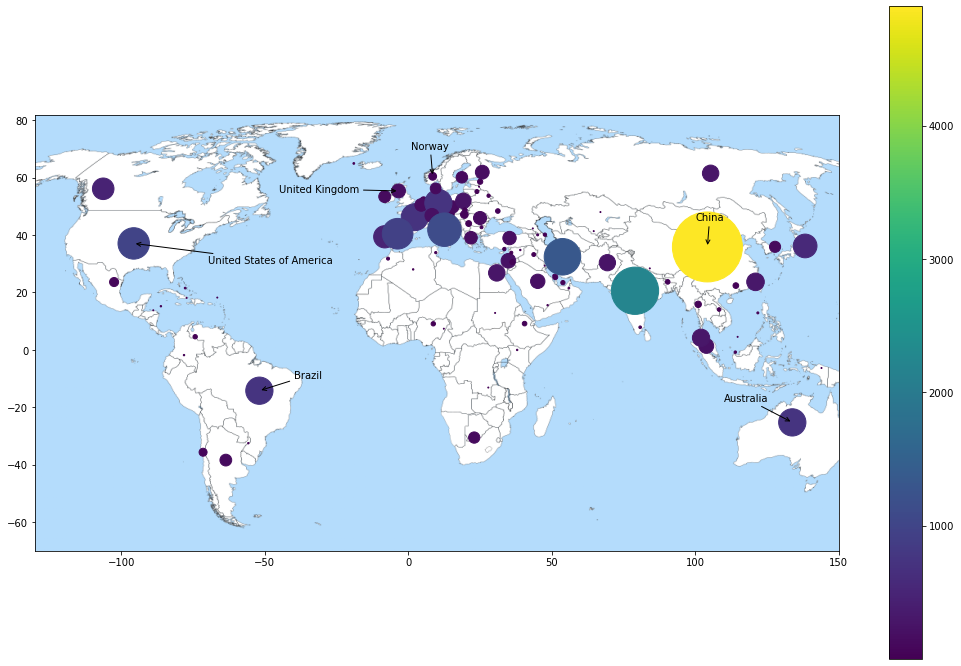

In [6]:
#Se crean listas vacías para el conteo de registros del bucle for.
#Lista para todos los paises
paises = []
#Longitud para cada país.
country_long = []
#Latitud para cada país.
country_lat = []
#Conteo para cada país.
country_count = []
for z in uniq_countries:
#Se selecciona para cada uno de los elementos en el listado de paises "unique_countries".
#Si se encuentran los keys "country_coords, entonces sigue las instrucciones"
    if z in country_coords.keys():
#Se crea el país que encuentra,
        paises.append(z)
#para el pais encontrado se recupera el elemento cero de country_coords "latitud",
        country_lat.append(country_coords[z][0])
#para el pais encontrado se recupera el elemento uno de country_coords "longitud".
        country_long.append(country_coords[z][1])
#Se cuenta el numero de veces que aparece el país en el listado "countries".
        country_count.append(countries.count(z))

import numpy as np
#Se muestra aquí la gráfica
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread("github/mapamundi.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-140, 202, -70, 82])

plt.scatter(country_long, country_lat, s = country_count, c= country_count)
plt.colorbar()
#Se seleccionan límites en "x" y "y" para que se muestren todos los continentes. 
plt.xlim(-130, 150)
plt.ylim(-70, 82)
#Se grafican algunos paises que se desea mostrar y se añade una flecha que va desde una coordenada a la otra.
ard = dict(arrowstyle="->")
#Se añade la coordenada de cada país y se colocan coordenadas con valores menores para que se observe la flecha. 
plt.annotate('United States of America', xy = (-95.712891,37.09024), 
               xytext = (-70, 30), arrowprops = ard)
plt.annotate('United Kingdom', xy = (-3.435973, 55.378051), 
               xytext = (-45, 55), arrowprops= ard)
plt.annotate('Brazil', xy = (-51.92528, -14.235004), 
               xytext = (-40, -10), arrowprops= ard)
plt.annotate('China', xy = (104.195397,35.86166), 
               xytext = (100, 45), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136,-25.274398), 
               xytext = (110, -18), arrowprops= ard)
plt.annotate('Norway', xy = (8.468946, 60.472024), 
               xytext = (1, 70), arrowprops= ard)
#Se crean una variable donde se añadiran los parametros de la gráfica.
params = plt.gcf()
#Permite obtener el tamaño de la grafica en pulgadas.
plSize = params.get_size_inches()
#Permite establecer el tamaño de grafica en pulgadas.
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
#Muestra la gráfica.

plt.show()

In [7]:
#Listado de conteos por cada país encontrado.
data = {"País": paises, "Longitud": country_long, 
        "Latitud":country_lat, "Conteos":country_count}
#Se crea un Dataframe 
df = pd.DataFrame(data)
df

,País,Longitud,Latitud,Conteos
0,Finland,25.748151,61.924110,190
1,Uzbekistan,64.585262,41.377491,1
2,Turkey,35.243322,38.963745,179
3,Israel,34.851612,31.046051,213
4,India,78.962880,20.593684,2236
...,...,...,...,...
93,Jordan,36.238414,30.585164,25
94,Sudan,30.217636,12.862807,1
95,Italy,12.567380,41.871940,1122
96,Denmark,9.501785,56.263920,116


In [8]:
#10 primeros registros de la tabla de conteo de autores por país.
df[:11]

,País,Longitud,Latitud,Conteos
0,Finland,25.748151,61.924110,190
1,Uzbekistan,64.585262,41.377491,1
2,Turkey,35.243322,38.963745,179
3,Israel,34.851612,31.046051,213
4,India,78.962880,20.593684,2236
5,Bangladesh,90.356331,23.684994,21
6,Latvia,24.603189,56.879635,1
7,El Salvador,-88.896530,13.794185,1
8,Sweden,18.643501,60.128161,132
9,Singapore,103.819836,1.352083,218
